### 정적 페이지 데이터 수집
- 네이버 연관 검색어 수집
- bs4 : BeautifulSoap : HTML(str) > CSS Selector를 이용하여 엘리먼트 선택

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
# 1. 웹서비스 분석 : URL

In [2]:
keyword = 'kt'
url = f'https://search.naver.com/search.naver?query={keyword}'
url

'https://search.naver.com/search.naver?query=kt'

In [ ]:
# 2. request(url) > response(html) : HTML(str)

In [3]:
response = requests.get(url)
response

<Response [200]>

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="kt : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'kt\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'kt\'의 네이버 통합검색 결과입니다."> <title>kt : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220728.css"> <link rel="stylesheet" type="text/css" href="ht
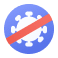
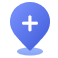
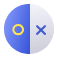
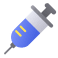

In [5]:
response.text

In [ ]:
# 3. HTML(str) > BeautifulSoup Object > BS(CSS Selector) > Data

In [7]:
dom = BeautifulSoup(response.text, "html.parser")
type(dom)

bs4.BeautifulSoup

In [8]:
# select() : 엘리먼트 여러개 선택
# select_one() : 엘리먼트 한개 선택
elements = dom.select(".lst_related_srch > .item")
len(elements)

10

In [9]:
elements[0]

<li class="item"> <a class="keyword" href="?where=nexearch&amp;query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&amp;ie=utf8&amp;sm=tab_she&amp;qdt=0" onclick="return goOtherCR(this, 'a=rsk_btm*q.list1&amp;r=1&amp;u=' + urlencode(this.href))"> <div class="tit">삼성전자</div> </a> </li>

In [10]:
keywords = []
for element in elements:
    keyword = element.select_one(".tit").text
    keywords.append(keyword)
    
keywords

['삼성전자',
 'kt 고객센터',
 'kt 인터넷',
 'ky',
 '환율',
 'kr',
 '날씨',
 'kt 대리점',
 'SKT',
 'kt 고객센터 전화번호']

In [11]:
keywords = [element.select_one(".tit").text for element in elements]
keywords

['삼성전자',
 'kt 고객센터',
 'kt 인터넷',
 'ky',
 '환율',
 'kr',
 '날씨',
 'kt 대리점',
 'SKT',
 'kt 고객센터 전화번호']